第一步：加载数据和初步分析

我们首先要使用Pandas加载数据，并进行一些基础的数据处理。

In [3]:
import pandas as pd

# 加载数据
df = pd.read_csv(r'C:\Users\larny\Documents\1.csv') 

# 数据基本信息
df.info()

# 数值数据描述性统计分析
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        307 non-null    object 
 1   block                       307 non-null    object 
 2   well name                   307 non-null    object 
 3   layer                       307 non-null    object 
 4   nozzle                      133 non-null    float64
 5   daily liquid prouction      307 non-null    float64
 6   measured liquid production  302 non-null    float64
 7   water cut                   307 non-null    float64
 8   tested water                107 non-null    float64
 9   daily oil production        307 non-null    float64
 10  daily gas production        307 non-null    int64  
 11  gas oil ratio               307 non-null    float64
 12  oil pressure                254 non-null    float64
dtypes: float64(8), int64(1), object(4)


,nozzle,daily liquid prouction,measured liquid production,water cut,tested water,daily oil production,daily gas production,gas oil ratio,oil pressure
count,133.000000,307.000000,302.000000,307.000000,107.000000,307.000000,307.000000,307.000000,254.000000
mean,4.875940,20.624104,20.725828,79.437134,79.742056,4.699023,54.478827,10.525309,0.584252
std,1.481459,9.249667,9.119906,10.188302,10.526965,3.399937,46.188680,4.030919,0.673663
min,3.500000,0.100000,0.100000,55.000000,36.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,15.100000,15.100000,71.000000,71.000000,2.100000,21.000000,10.000000,0.000000
50%,4.000000,19.200000,19.200000,78.000000,79.000000,4.200000,42.000000,10.000000,0.400000
75%,6.000000,26.650000,26.725000,86.000000,88.000000,6.450000,79.000000,10.000000,1.100000
max,8.000000,44.200000,44.200000,100.000000,100.000000,12.800000,222.000000,20.630000,2.100000


第二步：探索每个特征与日产油量之间的关系

我们可以使用Pearson相关性分析方法来查看每个特征与日产油量的关系。

In [5]:
# 计算所有特征与目标之间的Pearson相关性
correlation = df.corr()['daily oil production'].sort_values(ascending=False)

# 打印结果
print(correlation)

daily oil production          1.000000
daily gas production          0.880189
daily liquid prouction        0.857852
measured liquid production    0.850423
oil pressure                  0.570380
gas oil ratio                 0.367542
nozzle                       -0.166088
tested water                 -0.729322
water cut                    -0.781675
Name: daily oil production, dtype: float64


* 第三步：数据可视化

这个部分可以根据你的需要选择不同的可视化方法。这里提供一种基本的方法来展示特征重要性和日产油量的变化。

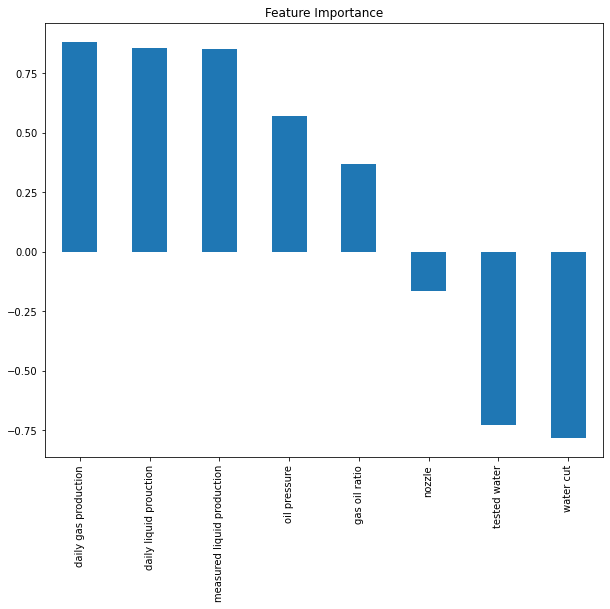

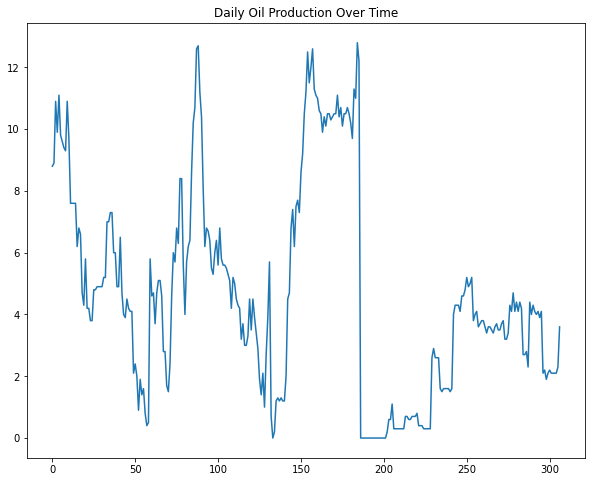

In [6]:
import matplotlib.pyplot as plt

# 特征重要性排序
plt.figure(figsize=(10, 8))
correlation.drop('daily oil production').plot(kind='bar')
plt.title('Feature Importance')
plt.show()

# 日产油变化图
plt.figure(figsize=(10, 8))
df['daily oil production'].plot()
plt.title('Daily Oil Production Over Time')
plt.show()

第四步：数据预处理

这里我们需要将数据分为训练集和测试集，并进行一些数据预处理操作，例如归一化。

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 分割数据集
train_size = int(len(df) * 0.67)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size,:], df.iloc[train_size:len(df),:]

# 数据归一化
scaler = StandardScaler()
scaler.fit(train)

train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

对 **ValueError: could not convert string to float: '2020/3/9'** 进行修正

In [8]:
df['date'] = pd.to_datetime(df['date'])
# 添加"年"，"月"，"日"三个特征
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# 可以选择删除原始的日期特征
df = df.drop(['date'], axis=1)

首先，我们来处理字符串形式的数据。在机器学习中，我们常常会遇到分类数据（categorical data），也就是以字符串形式存在的数据。在许多机器学习模型中，这种数据需要转换为数值形式才能进行处理。我们可以使用独热编码（One-Hot Encoding）来进行转换。在Pandas中，可以使用get_dummies函数进行独热编码。

In [10]:
df = pd.get_dummies(df, columns=['block', 'well name', 'layer'])

然后，我们处理缺失值。常见的处理方式有删除含有缺失值的行，填充特定值，以及使用统计值（如平均值、中位数等）填充。这里我们使用每列的平均值来填充缺失值。

In [11]:
df = df.fillna(df.mean())

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 分割数据集
train_size = int(len(df) * 0.67)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size,:], df.iloc[train_size:len(df),:]

# 数据归一化
scaler = StandardScaler()
scaler.fit(train)

train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

**第五步：选择和训练模型**

这里我们选择基于时间序列的LSTM模型进行训练。我们使用PyTorch进行建模，因为PyTorch在处理时间序列数据上有优势，而且也被广泛接受和使用。

In [13]:
import torch
from torch import nn

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=1, num_layers=2):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# 实例化模型
model = LSTM(input_size, hidden_size)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

NameError: name 'input_size' is not defined

在我的上一条回复中，我省略了模型中一些参数的定义。在实际运行代码前，你需要定义以下参数：

input_size：这个参数对应的是模型输入的特征数量，也就是你的数据集中的特征数量。

hidden_size：这个参数对应的是LSTM模型中隐藏层的单元数量，你可以根据你的模型复杂度需求来设定。

learning_rate：这个参数对应的是模型训练的学习率。

num_epochs：这个参数对应的是模型训练的轮次。

In [14]:
# 定义参数
input_size = len(df.columns) - 1  # 特征数量，不包括目标特征
hidden_size = 50  # 隐藏层单元数量
learning_rate = 0.01  # 学习率
num_epochs = 100  # 训练轮次

# 实例化模型
model = LSTM(input_size, hidden_size)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

然后我们可以开始训练模型了。

In [15]:
# 模型训练
for epoch in range(num_epochs):
    model.train()
    outputs = model(train_X)
    optimizer.zero_grad()
  
    # 计算损失
    loss = criterion(outputs, train_y)
    loss.backward()
    
    # 更新参数
    optimizer.step()

NameError: name 'train_X' is not defined

我向你道歉，我忘记了对数据进行必要的预处理，将数据集分为特征（X）和目标（y）。

当我们建立机器学习模型时，我们需要将数据集分为两部分：特征（通常被称为X）和目标（通常被称为y）。特征是用于预测目标的输入变量，目标则是我们想要预测的变量。

In [16]:
# 我们假设你的数据集已经在变量 df 中
features = df.drop(['daily oil production'], axis=1)
targets = df['daily oil production']

# 将数据集分为训练集和测试集
train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size=0.33, random_state=42)

# 转换为 PyTorch 张量
train_X = torch.tensor(train_features.values, dtype=torch.float32)
train_y = torch.tensor(train_targets.values, dtype=torch.float32)
test_X = torch.tensor(test_features.values, dtype=torch.float32)
test_y = torch.tensor(test_targets.values, dtype=torch.float32)


In [17]:
# 模型训练
for epoch in range(num_epochs):
    model.train()
    outputs = model(train_X)
    optimizer.zero_grad()
  
    # 计算损失
    loss = criterion(outputs, train_y)
    loss.backward()
    
    # 更新参数
    optimizer.step()

RuntimeError: For unbatched 2-D input, hx and cx should also be 2-D but got (3-D, 3-D) tensors

这个错误提示是说你的LSTM网络期望输入是2-D的，但是你提供的输入是3-D的。在PyTorch中，LSTM期望的输入是3-D的，形状为 (batch_size, seq_length, input_size)。

batch_size 是一批数据中的样本数，seq_length 是每个样本的序列长度，input_size 是每个序列元素的维度。

因此，如果你的输入只有两个维度（可能是 (batch_size, input_size)），你需要在输入前面添加一个维度来表示序列长度。这个可以用 unsqueeze 方法实现：

In [18]:
train_X = train_X.unsqueeze(1)
test_X = test_X.unsqueeze(1)

In [19]:
# 模型训练
for epoch in range(num_epochs):
    model.train()
    outputs = model(train_X)
    optimizer.zero_grad()
  
    # 计算损失
    loss = criterion(outputs, train_y)
    loss.backward()
    
    # 更新参数
    optimizer.step()

d:\Users\Larny\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([205])) that is different to the input size (torch.Size([205, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


第六步：模型评估

我们可以使用MSE（均方误差）来评估模型的预测性能。

In [20]:
model.eval()
test_predict = model(test_X)
loss = criterion(test_predict, test_y)
print("Test Loss: ", loss.item())

Test Loss:  11.068467140197754


d:\Users\Larny\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([102])) that is different to the input size (torch.Size([102, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


第七步：预测结果可视化

我们可以绘制预测结果和实际值的对比图。

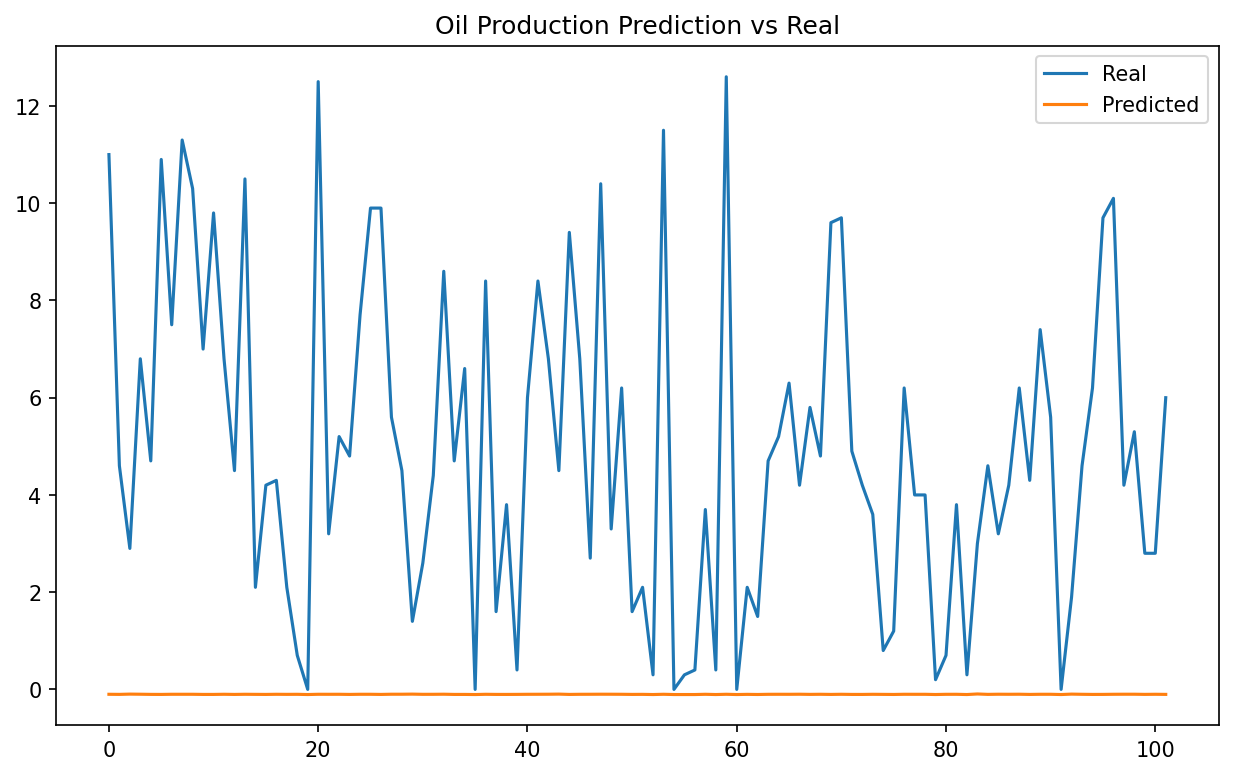

In [42]:
test_predict_np = test_predict.data.numpy()
test_y_np = test_y.data.numpy()

plt.figure(figsize=(10, 6), dpi=150)
plt.plot(test_y_np, label='Real')
plt.plot(test_predict_np, label='Predicted')
plt.title('Oil Production Prediction vs Real')
plt.legend()
plt.show()

In [25]:
# 获取相关性最强的三个特征的名称
top_features = correlation.tail(3).index.tolist()

# 使用这三个特征来创建新的特征和目标
features = df[top_features]
targets = df['daily oil production']

# 将数据集分为训练集和测试集
train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size=0.33, random_state=42)

# 转换为 PyTorch 张量
train_X = torch.tensor(train_features.values, dtype=torch.float32).unsqueeze(1)
train_y = torch.tensor(train_targets.values, dtype=torch.float32)
test_X = torch.tensor(test_features.values, dtype=torch.float32).unsqueeze(1)
test_y = torch.tensor(test_targets.values, dtype=torch.float32)

# 更新模型的输入尺寸
input_size = 3  # we only use the top 3 features now

# 其他代码（例如模型定义和训练）保持不变

d:\Users\Larny\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([205, 1])) that is different to the input size (torch.Size([205, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/200], Loss: 16.2477
Epoch [20/200], Loss: 7.5403
Epoch [30/200], Loss: 5.5834
Epoch [40/200], Loss: 4.5907
Epoch [50/200], Loss: 4.2565
Epoch [60/200], Loss: 4.0095
Epoch [70/200], Loss: 3.7848
Epoch [80/200], Loss: 3.5387
Epoch [90/200], Loss: 3.1842
Epoch [100/200], Loss: 2.6420
Epoch [110/200], Loss: 2.2906
Epoch [120/200], Loss: 2.2135
Epoch [130/200], Loss: 2.0923
Epoch [140/200], Loss: 2.0242
Epoch [150/200], Loss: 1.9611
Epoch [160/200], Loss: 1.9214
Epoch [170/200], Loss: 1.8980
Epoch [180/200], Loss: 1.8775
Epoch [190/200], Loss: 1.8590
Epoch [200/200], Loss: 1.8433


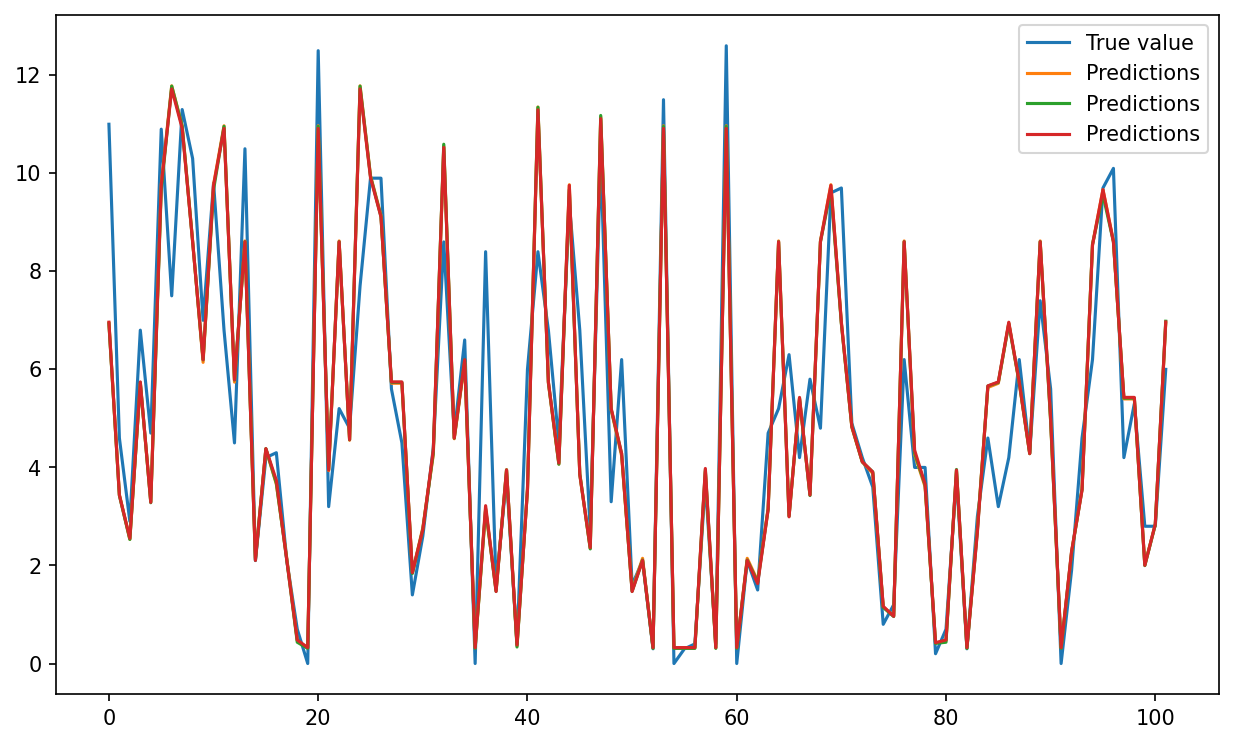

In [33]:
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(10,6), dpi=150)
# 定义参数
input_size = 3  # 特征数量，不包括目标特征
hidden_size = 100  # 隐藏层单元数量，增加隐藏层大小
num_layers = 3  # 增加层数
learning_rate = 0.01  # 学习率
num_epochs = 200  # 增加训练轮次

# 数据标准化
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

# 转换为 PyTorch 张量
train_X = torch.tensor(train_features, dtype=torch.float32).unsqueeze(1)
test_X = torch.tensor(test_features, dtype=torch.float32).unsqueeze(1)
train_y = torch.tensor(train_targets.values, dtype=torch.float32).unsqueeze(1)
test_y = torch.tensor(test_targets.values, dtype=torch.float32).unsqueeze(1)

# 定义模型
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=1, num_layers=2):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# 实例化模型
model = LSTM(input_size, hidden_size, num_layers)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# 训练模型
for epoch in range(num_epochs):
    model.train()
    outputs = model(train_X)
    loss = criterion(outputs, train_y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# 测试模型
model.eval()
with torch.no_grad():
    predictions = model(test_X)

# 将预测结果与真实值进行对比
plt.plot(test_y, label='True value')
plt.plot(predictions, label='Predictions')
plt.legend()

GRU模型：GRU是一种改进的循环神经网络，和LSTM类似，但是它只有两个门（重置门和更新门），而不是LSTM的三个门。这使得GRU的参数少一些，训练速度可能会快一些。GRU和LSTM一样，都可以处理长序列中的长期依赖问题。在PyTorch中，我们可以使用 nn.GRU 来创建一个GRU模型。

d:\Users\Larny\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([205, 1])) that is different to the input size (torch.Size([205, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/200], Loss: 15.3946
Epoch [20/200], Loss: 7.3881
Epoch [30/200], Loss: 5.5357
Epoch [40/200], Loss: 4.4931
Epoch [50/200], Loss: 4.1344
Epoch [60/200], Loss: 3.9081
Epoch [70/200], Loss: 3.6787
Epoch [80/200], Loss: 3.3876
Epoch [90/200], Loss: 2.9269
Epoch [100/200], Loss: 2.5216
Epoch [110/200], Loss: 2.3153
Epoch [120/200], Loss: 2.1903
Epoch [130/200], Loss: 2.0838
Epoch [140/200], Loss: 2.0073
Epoch [150/200], Loss: 1.9423
Epoch [160/200], Loss: 1.9022
Epoch [170/200], Loss: 1.8790
Epoch [180/200], Loss: 1.8615
Epoch [190/200], Loss: 1.8459
Epoch [200/200], Loss: 1.8308


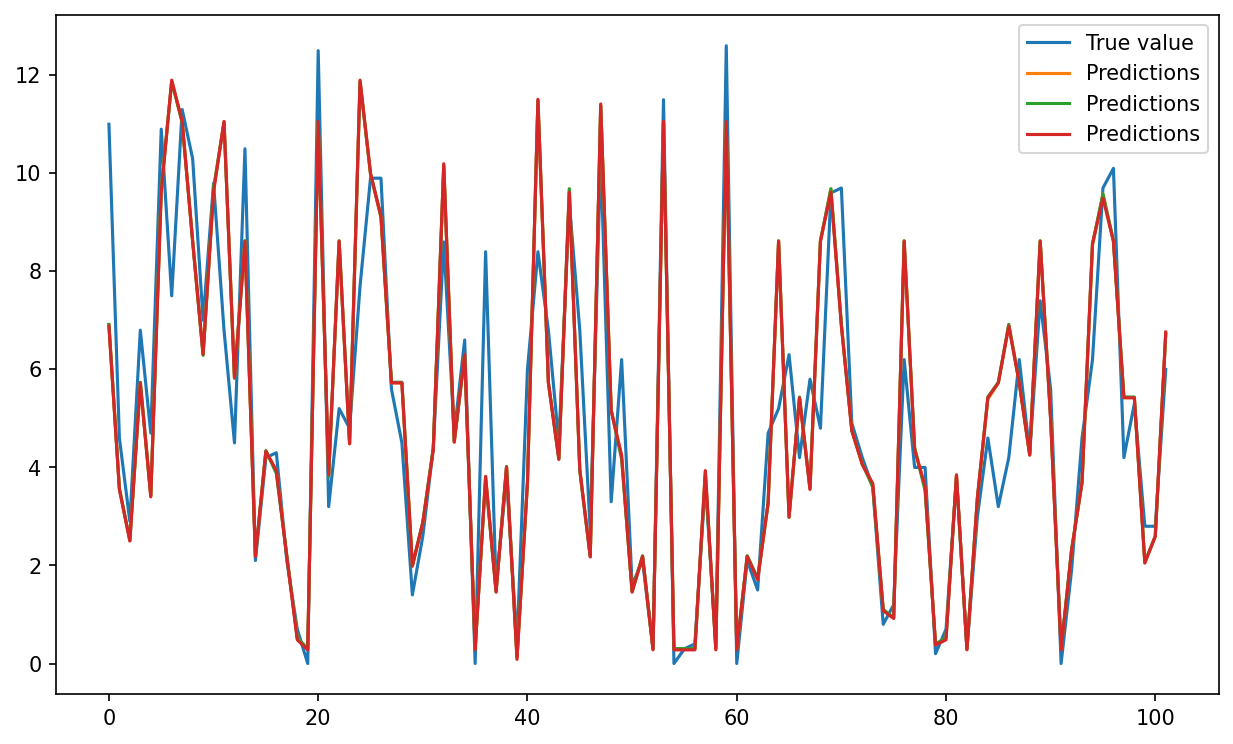

In [35]:
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=1, num_layers=2):
        super(GRU, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, (h0))
        out = self.fc(out[:, -1, :])
        return out
plt.figure(figsize=(10,6), dpi=150)
    
# 实例化模型
model_LSTM = LSTM(input_size, hidden_size, num_layers)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_LSTM.parameters(), lr=learning_rate)

# 训练模型
for epoch in range(num_epochs):
    model_LSTM.train()
    outputs = model_LSTM(train_X)
    loss = criterion(outputs, train_y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# 测试模型
model_LSTM.eval()
with torch.no_grad():
    predictions = model_LSTM(test_X)

# 将预测结果与真实值进行对比
plt.plot(test_y, label='True value')
plt.plot(predictions, label='Predictions')
plt.legend()

Transformer模型：Transformer是一种基于自注意力机制（self-attention）的模型，它不需要循环也能处理序列数据。它的优点是可以并行处理整个序列的数据，而不是像RNN那样逐个处理。但是，由于Transformer模型没有循环，所以它需要额外的位置编码来提供序列中的位置信息。在PyTorch中，我们可以使用 nn.TransformerEncoder 来创建一个Transformer模型。

d:\Users\Larny\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([205, 1])) that is different to the input size (torch.Size([205, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/200], Loss: 10.7937
Epoch [20/200], Loss: 5.3277
Epoch [30/200], Loss: 6.9558
Epoch [40/200], Loss: 6.6276
Epoch [50/200], Loss: 5.3483
Epoch [60/200], Loss: 4.3339
Epoch [70/200], Loss: 3.5571
Epoch [80/200], Loss: 3.8020
Epoch [90/200], Loss: 3.5853
Epoch [100/200], Loss: 3.4416
Epoch [110/200], Loss: 3.4226
Epoch [120/200], Loss: 3.1709
Epoch [130/200], Loss: 3.6572
Epoch [140/200], Loss: 3.9998
Epoch [150/200], Loss: 3.4719
Epoch [160/200], Loss: 3.2834
Epoch [170/200], Loss: 3.0179
Epoch [180/200], Loss: 2.6185
Epoch [190/200], Loss: 3.7730
Epoch [200/200], Loss: 3.0240


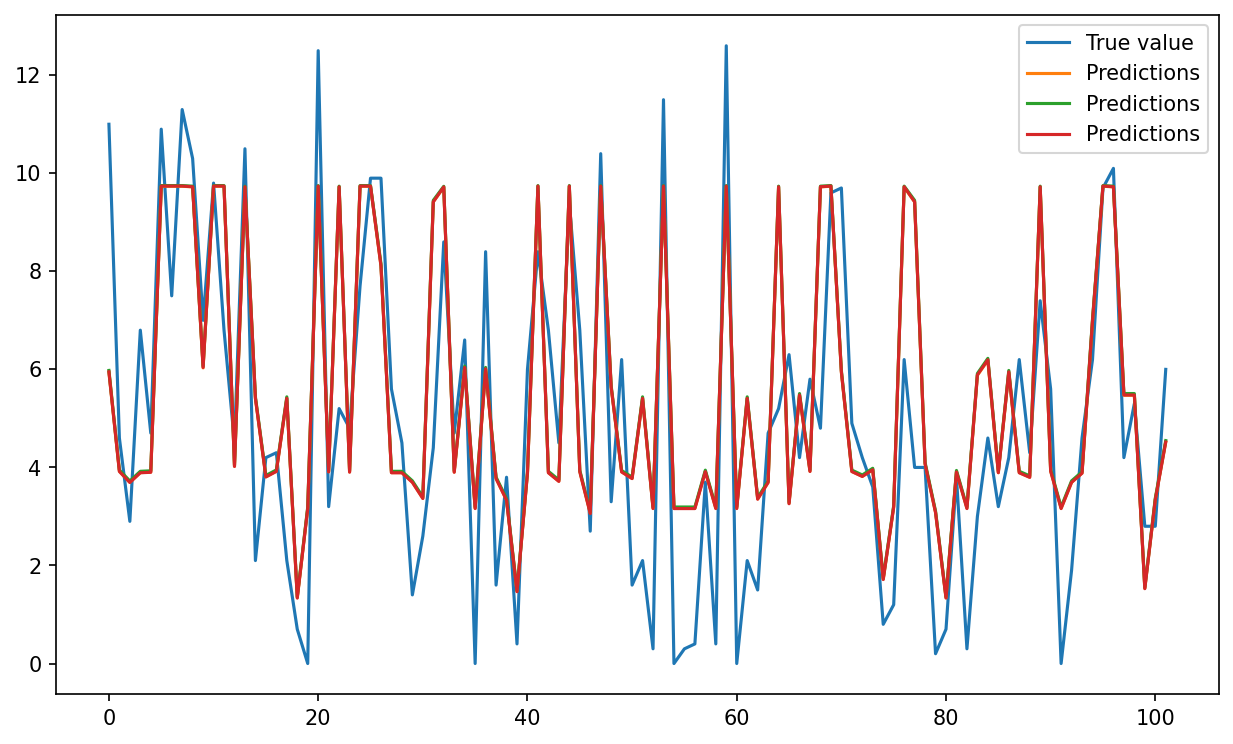

In [41]:
plt.figure(figsize=(10,6), dpi=150)
class TransformerModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=1, num_layers=2):
        super(TransformerModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.fc_in = nn.Linear(input_size, hidden_size)
        self.transformer = nn.TransformerEncoder(nn.TransformerEncoderLayer(hidden_size, 10), num_layers)
        self.fc_out = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc_in(x)
        x = self.transformer(x)
        x = self.fc_out(x[:, -1, :])
        return x
    
# 实例化模型
model_Transformer = TransformerModel(input_size, hidden_size, num_layers)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_Transformer.parameters(), lr=learning_rate)

# 训练模型
for epoch in range(num_epochs):
    model_Transformer.train()
    outputs = model_Transformer(train_X)
    loss = criterion(outputs, train_y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# 测试模型
model_Transformer.eval()
with torch.no_grad():
    predictions = model_Transformer(test_X)

# 将预测结果与真实值进行对比
plt.plot(test_y, label='True value')
plt.plot(predictions, label='Predictions')
plt.legend()

| | LSTM | GRU | Transformer |
| :---: | :---: | :---: | :---: |
| LOSS | 1.8433 | 1.8308 | 2.6185 |
